<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_H%C3%A0nh_Ti%E1%BB%81n_x%E1%BB%AD_l%C3%AD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Chuẩn hoá dữ liệu với Z-Score Scaling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,47.037363,7.652493,9.015934,24.264336,19.972586
1,37.972164,22.780415,9.462232,28.714062,17.498043
2,49.808630,6.413309,10.239434,2.259804,22.046804
3,58.964325,6.136665,9.987454,6.205261,21.743804
4,54.900892,0.839708,10.958829,16.142469,18.203220


# Trực quan hóa dữ liệu sinh ra

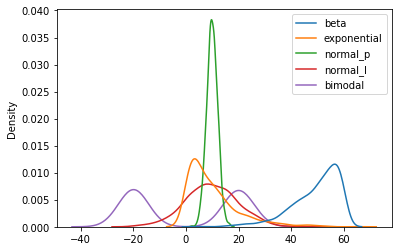

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.499015,10.102151,9.962263,9.749231,0.088351
std,8.957648,9.750732,2.067721,9.925569,20.205074
min,5.389653,0.019920,2.311003,-20.591565,-28.057137
25%,44.493446,3.123737,8.638592,3.048126,-19.976657
50%,51.814051,7.322884,9.950211,9.489029,0.722104
75%,56.487919,13.840549,11.325499,16.263959,20.119832
max,59.969669,64.938293,16.694947,49.349900,28.389537


## Thêm một đặc trưng với giá trị lớn hơn nhiều

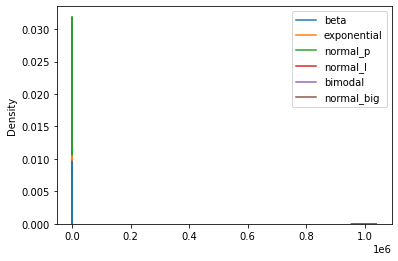

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

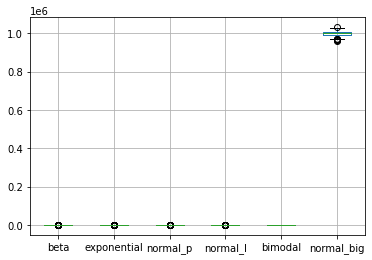

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

# Chuẩn hóa với StandardScaler (Z-Score scaling)

In [9]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.274948,-0.251354,-0.457896,1.463127,0.984613,0.190620
1,-1.287461,1.300888,-0.241948,1.911661,0.862081,0.045209
2,0.034582,-0.378504,0.134114,-0.754937,1.087323,0.125250
3,1.057202,-0.406889,0.012189,-0.357233,1.072319,-0.749571
4,0.603348,-0.950398,0.482205,0.644440,0.896999,0.091984


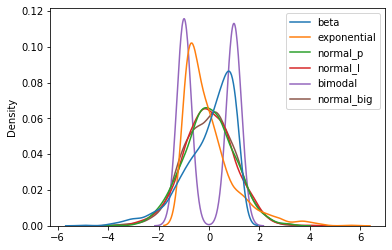

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.180478e-16,-3.930190e-17,-4.687362e-16,1.574296e-16,1.409983e-17,5.376810e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.926676e+00,-1.034515e+00,-3.702187e+00,-3.058361e+00,-1.393688e+00,-3.854224e+00
25%,-5.590836e-01,-7.160391e-01,-6.404798e-01,-6.754735e-01,-9.935647e-01,-7.015406e-01
50%,2.585717e-01,-2.851742e-01,-5.831262e-03,-2.622847e-02,3.138171e-02,3.228530e-02
75%,7.806069e-01,3.835886e-01,6.596239e-01,6.566865e-01,9.919045e-01,7.041556e-01
max,1.169492e+00,5.626612e+00,3.257719e+00,3.991759e+00,1.401398e+00,3.184728e+00


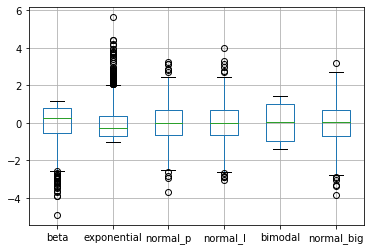

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

# **[Thực hành] Chuẩn hoá dữ liệu với Min-Max Scaling**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [16]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [17]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [18]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.885770,4.193836,11.129180,-1.904774,18.770513
1,41.030592,22.981728,7.319562,9.427947,22.270905
2,49.885406,7.552321,10.869640,23.579707,20.927831
3,54.950876,5.442103,12.590526,21.918297,23.219720
4,53.064262,1.084289,8.224001,-0.959701,20.390398


# Trực quan hóa dữ liệu sinh ra

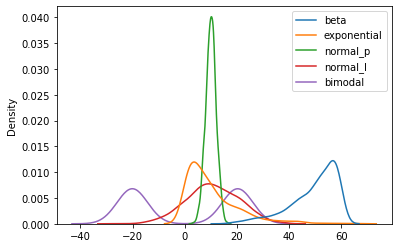

In [19]:
sns.kdeplot(data=df)

In [20]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.635545,10.486862,9.994787,10.726476,0.042900
std,8.970589,10.310719,1.978341,10.053857,20.382294
min,16.872037,0.002073,3.200583,-25.768724,-27.891170
25%,44.847301,3.101288,8.678890,4.127813,-20.188925
50%,52.122058,7.443916,10.024498,10.542872,0.274645
75%,56.774106,14.586754,11.272535,18.025111,20.368806
max,59.973716,65.582077,16.136702,38.612310,27.920825


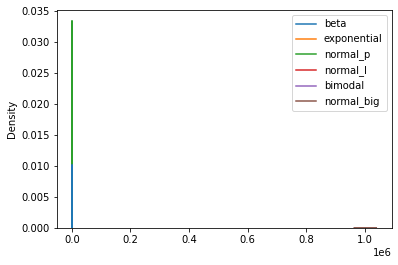

In [21]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

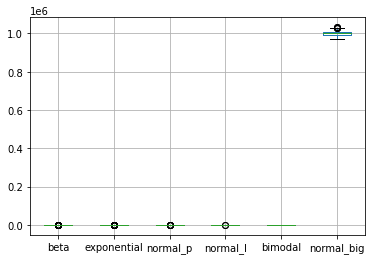

In [23]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

# Chuẩn hóa với Min-Max scaling

In [24]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [26]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.974759,0.063918,0.612904,0.370667,0.836051,0.265393
1,0.560501,0.350406,0.318409,0.546693,0.898769,0.356427
2,0.765942,0.115130,0.592841,0.766506,0.874704,0.297158
3,0.883465,0.082953,0.725870,0.740700,0.915769,0.233760
4,0.839694,0.016502,0.388325,0.385347,0.865075,0.510478


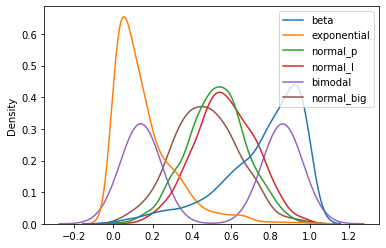

In [27]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

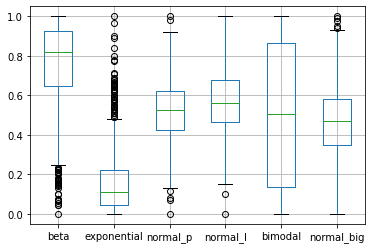

In [28]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [29]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.760145,0.159878,0.525212,0.566863,0.500503,0.469275
std,0.208126,0.157224,0.152932,0.156162,0.365196,0.169673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.649053,0.047259,0.423489,0.464369,0.138003,0.349751
50%,0.817834,0.113477,0.527509,0.564011,0.504655,0.470352
75%,0.925766,0.222395,0.623986,0.680229,0.864688,0.583180
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [31]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [32]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[16.872037454415285,
 0.002073484068669149,
 3.200583026882894,
 -25.76872369420372,
 -27.891170417316594,
 972028.9151960075]

In [33]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.97371592190268,
 65.5820773190535,
 16.136701750340844,
 38.61231048160704,
 27.92082496682169,
 1031949.7730676095]

In [35]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]